In [1]:
# adding all the imports used throughout the notebook
%reload_ext nb_black

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from ipywidgets import interact

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AgglomerativeClustering,
    AffinityPropagation,
    MeanShift,
)

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage

try:
    import prince
except ModuleNotFoundError:
    !pip install prince
    import prince

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

<IPython.core.display.Javascript object>

In [2]:
filepath = "mta_1710.csv"

nyc = pd.read_csv(filepath)

# due to the data set being so large, to save time I am subsampling the data to help with speed up executing code, 
# eventually comment out later
nyc = nyc.sample(100000, random_state=13)

<IPython.core.display.Javascript object>

In [3]:
nyc.head(20)

RecordedAtTime  DirectionRef PublishedLineName  \
3325478  2017-10-16 10:24:40             0               S46   
2220782  2017-10-11 08:05:52             1              M14D   
1628146  2017-10-08 13:41:07             0           M15-SBS   
5204577  2017-10-24 15:39:50             1               B82   
3941027  2017-10-18 18:18:12             1                X8   
819602   2017-10-04 17:04:39             1               Bx6   
4544568  2017-10-21 11:54:55             1               Q85   
4806784  2017-10-23 01:47:34             1               S62   
3115261  2017-10-15 06:52:53             0          M34A-SBS   
155978   2017-10-02 06:06:01             0                B9   
972912   2017-10-05 10:05:29             0                M1   
5211598  2017-10-24 16:10:54             0                M4   
5084428  2017-10-24 07:20:17             0               B15   
4339398  2017-10-20 12:23:52             1               Q27   
6686898  2017-10-31 09:26:34             1               B38   
3763543  2017-10-18 06:27:43             0           B44-SBS   
814150   2017-10-04 16:44:21             1                B1   
4563782  2017-10-21 13:45:45             0                M4   
136506   2017-10-01 22:55:52             1               B64   
2353262  2017-10-11 17:15:30             0               B52   

                                OriginName  OriginLat  OriginLong  \
3325478      TELEPORT DR/CORP COMMONS BLDG  40.604707  -74.178580   
2220782            DELANCEY ST/COLUMBIA ST  40.716423  -73.980250   
1628146               SOUTH FERRY/TERMINAL  40.702172  -74.013533   
5204577         SEAVIEW AV/PENNSYLVANIA AV  40.642980  -73.878336   
3941027               TRINITY PL/RECTOR ST  40.708007  -74.012714   
819602            FOOD CENTER DR/MARKET ST  40.809978  -73.876657   
4544568  WEST CIRCLE DR /PARKING STRUCTURE  40.661908  -73.723262   
4806784          ST GEORGE FERRY/S62 & S92  40.643176  -74.074305   
3115261                       9 AV/W 42 ST  40.758617  -73.992640   
155978                      SHORE RD/71 ST  40.636852  -74.036257   
972912                  CENTRE ST/GRAND ST  40.719950  -73.998300   
5211598                       W 32 ST/7 AV  40.749406  -73.991017   
5084428          MARCUS GARVEY BL/BROADWAY  40.699722  -73.941516   
4339398                       138 ST/37 AV  40.761806  -73.829556   
6686898           METROPOLITAN AV/STARR ST  40.713350  -73.914305   
3763543                   NOSTRAND AV/AV H  40.631827  -73.947438   
814150                          87 ST/4 Av  40.621924  -74.028495   
4563782                       W 32 ST/7 AV  40.749406  -73.991017   
136506                  SHORE RD/MACKAY PL  40.637203  -74.036023   
2353262             CADMAN PZ W/TILLARY ST  40.695999  -73.990945   

                                  DestinationName  DestinationLat  \
3325478               ST GEORGE FERRY via CASTLTN       40.643585   
2220782             CHELSEA PIERS 11 AV CROSSTOWN       40.744417   
1628146         SELECT BUS SERVICE 125ST via 1 AV       40.803150   
5204577  CONEY ISLAND via FLATLANDS via KINGS HWY       40.576973   
3941027  ELVLE TRANS CTR via F CAP BL via GFRDS L       40.560836   
819602                WASHINGTON HTS RIVERSIDE DR       40.836205   
4544568                     JAMAICA PRSNS - ARCHR       40.701681   
4806784                        TRAVIS via VICTORY       40.586573   
3115261   SELECT BUS WATERSIDE VIA 34 ST VIA 2 AV       40.737552   
155978         KINGS PLAZA via 60 ST via AVENUE M       40.608425   
972912                  HARLEM 147 ST via MADISON       40.821108   
5211598  WSHNGTN HTS CLOISTRS via MADSON via BWAY       40.865644   
5084428                               JFK AIRPORT       40.646909   
4339398                                JAMAICA AV       40.718636   
6686898                    DNTWN BKLYN TILLARY ST       40.696117   
3763543   SBS FLUSHING AV via NOSTRAND via ROGERS       40.698884   
814150               MANHATTAN BEACH KINGSBORO

<IPython.core.display.Javascript object>

In [4]:
nyc["ArrivalProximityText"].value_counts()

approaching        37350
< 1 stop away      30965
at stop            28472
0.6 miles away       539
0.7 miles away       405
                   ...  
11.4 miles away        1
20.4 miles away        1
9.8 miles away         1
9.1 miles away         1
10.4 miles away        1
Name: ArrivalProximityText, Length: 161, dtype: int64

<IPython.core.display.Javascript object>

In [5]:
nyc.shape

(100000, 17)

<IPython.core.display.Javascript object>

In [6]:
@interact
def do_stuff_interactively(
    text="text input",
    select=["option 1", "option2"],
    num=5,
    num_range=(3, 8),
    bool_tf=True,
):
    """
    * Name the function whatever you want
    * Name the arguments whatever you want
    * @interact chooses an appropriate widget based on default args
    * Do whatever you want in the function code
    * Function will be rerun every time the input changes
    """
    print("^Above widgets auto-generated by `@interact`")
    print("\n----------------------------\n")
    print("Below are the outputs of the function:\n")

    print(f"text: {text}")
    print(f"select: {select}")
    print(f"num: {num}")
    print(f"num_range: {num_range}")
    print(f"bool_tf: {bool_tf}")

interactive(children=(Text(value='text input', description='text'), Dropdown(description='select', options=('o…

<IPython.core.display.Javascript object>

## Data Cleaning

#### Checking for missing values and filling in NANs

In [7]:
# Expected Arrival Time has around 16% missing rows,
# I plan to fill with forward fill.
nyc.isna().mean()

RecordedAtTime               0.00000
DirectionRef                 0.00000
PublishedLineName            0.00000
OriginName                   0.00902
OriginLat                    0.00902
OriginLong                   0.00902
DestinationName              0.00000
DestinationLat               0.00138
DestinationLong              0.00138
VehicleRef                   0.00000
VehicleLocation.Latitude     0.00000
VehicleLocation.Longitude    0.00000
NextStopPointName            0.00110
ArrivalProximityText         0.00110
DistanceFromStop             0.00110
ExpectedArrivalTime          0.16159
ScheduledArrivalTime         0.02167
dtype: float64

<IPython.core.display.Javascript object>

In [8]:
# first I examine the missing data and see if there are any noticeable patterns
nyc.loc[nyc.isnull().any(axis=1)].head()

RecordedAtTime  DirectionRef PublishedLineName  \
2220782  2017-10-11 08:05:52             1              M14D   
972912   2017-10-05 10:05:29             0                M1   
5300789  2017-10-24 23:30:52             0               B57   
4356026  2017-10-20 13:43:02             1               S78   
5600940  2017-10-26 08:03:04             1           M15-SBS   

                      OriginName  OriginLat  OriginLong  \
2220782  DELANCEY ST/COLUMBIA ST  40.716423  -73.980250   
972912        CENTRE ST/GRAND ST  40.719950  -73.998300   
5300789       BEARD ST/OTSEGO ST  40.672313  -74.011308   
4356026      ST GEORGE FERRY/S78  40.643655  -74.073470   
5600940            E 126 ST/2 AV  40.803230  -73.932451   

                                 DestinationName  DestinationLat  \
2220782            CHELSEA PIERS 11 AV CROSSTOWN       40.744417   
972912                 HARLEM 147 ST via MADISON       40.821108   
5300789                    MASPETH FRESH POND RD       40.721267   
4356026                           BRICKTOWN MALL       40.530061   
5600940  SELECT BUS SERVICE SOUTH FERRY via 2 AV       40.702123   

         DestinationLong VehicleRef  VehicleLocation.Latitude  \
2220782       -74.008150  NYCT_5634                 40.734741   
972912        -73.935894  NYCT_6788                 40.802146   
5300789       -73.903751  NYCT_7252                 40.700409   
4356026       -74.226654  NYCT_8179                 40.626734   
5600940       -74.013662  NYCT_1247                 40.762678   

         VehicleLocation.Longitude      NextStopPointName  \
2220782                 -73.990540     E 14 ST/UNION SQ W   
972912                  -73.943270    MADISON AV/E 121 ST   
5300789                 -73.944564  FLUSHING AV/THROOP AV   
4356026                 -74.078077     CANAL ST/WRIGHT ST   
5600940                 -73.962833           2 AV/E 57 ST   

        ArrivalProximityText  DistanceFromStop ExpectedArrivalTime  \
2220782        < 1 stop away             156.0                 NaN   
972912         < 1 stop away             172.0                 NaN   
5300789          approaching              34.0                 NaN   
4356026              at stop              13.0                 NaN   
5600940        < 1 stop away             470.0                 NaN   

        ScheduledArrivalTime  
2220782             08:07:39  
972912              10:08:03  
5300789             23:34:12  
4356026             13:39:51  
5600940             08:04:07

<IPython.core.display.Javascript object>

In [9]:
# forward fill missing rows
nyc = nyc.fillna(method="ffill")
nyc.head()

RecordedAtTime  DirectionRef PublishedLineName  \
3325478  2017-10-16 10:24:40             0               S46   
2220782  2017-10-11 08:05:52             1              M14D   
1628146  2017-10-08 13:41:07             0           M15-SBS   
5204577  2017-10-24 15:39:50             1               B82   
3941027  2017-10-18 18:18:12             1                X8   

                            OriginName  OriginLat  OriginLong  \
3325478  TELEPORT DR/CORP COMMONS BLDG  40.604707  -74.178580   
2220782        DELANCEY ST/COLUMBIA ST  40.716423  -73.980250   
1628146           SOUTH FERRY/TERMINAL  40.702172  -74.013533   
5204577     SEAVIEW AV/PENNSYLVANIA AV  40.642980  -73.878336   
3941027           TRINITY PL/RECTOR ST  40.708007  -74.012714   

                                  DestinationName  DestinationLat  \
3325478               ST GEORGE FERRY via CASTLTN       40.643585   
2220782             CHELSEA PIERS 11 AV CROSSTOWN       40.744417   
1628146         SELECT BUS SERVICE 125ST via 1 AV       40.803150   
5204577  CONEY ISLAND via FLATLANDS via KINGS HWY       40.576973   
3941027  ELVLE TRANS CTR via F CAP BL via GFRDS L       40.560836   

         DestinationLong VehicleRef  VehicleLocation.Latitude  \
3325478       -74.072610  NYCT_8217                 40.635759   
2220782       -74.008150  NYCT_5634                 40.734741   
1628146       -73.932264  NYCT_1257                 40.802924   
5204577       -73.981396  NYCT_4970                 40.576984   
3941027       -74.171120  NYCT_2678                 40.576383   

         VehicleLocation.Longitude        NextStopPointName  \
3325478                 -74.083678     VICTORY BL/ BROOK ST   
2220782                 -73.990540       E 14 ST/UNION SQ W   
1628146                 -73.931875            E 126 ST/2 AV   
5204577                 -73.981536  MERMAID AV/STILLWELL AV   
3941027                 -74.100390      HYLAN BL/LINCOLN AV   

        ArrivalProximityText  DistanceFromStop  ExpectedArrivalTime  \
3325478        < 1 stop away             322.0  2017-10-16 10:25:48   
2220782        < 1 stop away             156.0  2017-10-16 10:25:48   
1628146          approaching              40.0  2017-10-08 13:41:22   
5204577              at stop              11.0  2017-10-24 15:39:57   
3941027        < 1 stop away             482.0  2017-10-18 18:21:16   

        ScheduledArrivalTime  
3325478             10:23:20  
2220782             08:07:39  
1628146             13:38:00  
5204577             15:30:00  
3941027             18:12:24

<IPython.core.display.Javascript object>

In [10]:
nyc.isna().mean()

RecordedAtTime               0.0
DirectionRef                 0.0
PublishedLineName            0.0
OriginName                   0.0
OriginLat                    0.0
OriginLong                   0.0
DestinationName              0.0
DestinationLat               0.0
DestinationLong              0.0
VehicleRef                   0.0
VehicleLocation.Latitude     0.0
VehicleLocation.Longitude    0.0
NextStopPointName            0.0
ArrivalProximityText         0.0
DistanceFromStop             0.0
ExpectedArrivalTime          0.0
ScheduledArrivalTime         0.0
dtype: float64

<IPython.core.display.Javascript object>

#### Checking for values with insufficient amount of information

In [11]:
nyc["DirectionRef"].value_counts()

1    50200
0    49800
Name: DirectionRef, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# there are certain published line names with only 1 value in it, for this project I want to only work with 
# larger groups so I will be removing smaller groups.
nyc["PublishedLineName"].value_counts()

B6         1837
B41        1545
Q58        1436
Q44-SBS    1300
Bx36       1280
           ... 
Q104          1
Q22           1
BM2           1
BxM18         1
QM1           1
Name: PublishedLineName, Length: 307, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# get rid of values in published line name with less than 100 values.
count = nyc["PublishedLineName"].value_counts()
keep = count[count > 100].index
nyc = nyc[nyc["PublishedLineName"].isin(keep)]

<IPython.core.display.Javascript object>

In [14]:
# I am performing the same data cleaning as above. I plan to continue to do the same for the features below. 
nyc["OriginName"].value_counts()

MERRICK BL/ARCHER AV          1444
E 126 ST/2 AV                 1422
W 179 ST/BROADWAY             1281
HARWAY AV/BAY 37 ST           1032
138 ST/37 AV                  1028
                              ... 
MERRICK BL/SPRINGFIELD BL        1
12 AV/ 80 ST                     1
CORPORAL KENNEDY ST/33 AV        1
BAY PLAZA BL/IFO JC PENNEY       1
HORACE HARDING EXP/108 ST        1
Name: OriginName, Length: 567, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
# get rid of values in origin name with less than 100 values.
count = nyc["OriginName"].value_counts()
keep = count[count > 99].index
nyc = nyc[nyc["OriginName"].isin(keep)]

<IPython.core.display.Javascript object>

In [16]:
nyc["DestinationName"].value_counts()

WASHINGTON HTS GW BRIDGE                  1269
ST GEORGE FERRY                            883
FLUSHING  MAIN ST STA                      790
W FARMS RD SOUTHERN BL                     756
SELECT BUS JAMAICA via MAIN ST             642
                                          ... 
8 AV - 57 ST                                 1
UTOPIA PKY                                   1
ELTINGVILLE TRANSIT CTR via AR KILL RD       1
WEST SIDE 42 ST PIER CROSSTOWN               1
E 49 ST & 1 AV                               1
Name: DestinationName, Length: 501, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
# get rid of values in destination name with less than 100 values.
count = nyc["DestinationName"].value_counts()
keep = count[count > 99].index
nyc = nyc[nyc["DestinationName"].isin(keep)]

<IPython.core.display.Javascript object>

In [18]:
nyc["VehicleRef"].value_counts()

NYCT_5845    59
NYCT_5850    54
NYCT_4582    52
NYCT_4239    51
NYCT_4831    50
             ..
NYCT_2504     1
NYCT_678      1
NYCT_2302     1
NYCT_4308     1
NYCT_2587     1
Name: VehicleRef, Length: 4261, dtype: int64

<IPython.core.display.Javascript object>

In [19]:
# get rid of values in vehicle ref with less than 100 values.
# count = nyc["VehicleRef"].value_counts()
# keep = count[count > 99].index
# nyc = nyc[nyc["VehicleRef"].isin(keep)]

<IPython.core.display.Javascript object>

In [20]:
nyc["NextStopPointName"].value_counts()

W 181 ST/AMSTERDAM AV    179
MERRICK BL/ARCHER AV     171
KINGS PLAZA              162
HOYT AV/31 ST            148
E 136 ST/LINCOLN AV      145
                        ... 
4 AV/CARROLL ST            1
STORY AV/ELDER AV          1
HYATT ST/CENTRAL AV        1
HYLAN BL/KRAMER ST         1
CLASSON AV/GATES AV        1
Name: NextStopPointName, Length: 7844, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
# get rid of values in next stop point name with less than 20 values.
count = nyc["NextStopPointName"].value_counts()
keep = count[count > 19].index
nyc = nyc[nyc["NextStopPointName"].isin(keep)]

<IPython.core.display.Javascript object>

In [22]:
nyc["ArrivalProximityText"].value_counts()

< 1 stop away      14063
approaching        14017
at stop            11730
0.6 miles away       354
0.5 miles away       250
                   ...  
20.4 miles away        1
15.2 miles away        1
14.1 miles away        1
16.0 miles away        1
10.4 miles away        1
Name: ArrivalProximityText, Length: 125, dtype: int64

<IPython.core.display.Javascript object>

In [23]:
# get rid of values in arrival proximity text with less than 20 values.
count = nyc["ArrivalProximityText"].value_counts()
keep = count[count > 19].index
nyc = nyc[nyc["ArrivalProximityText"].isin(keep)]

<IPython.core.display.Javascript object>

#### Change data types 

In [24]:
nyc.dtypes

RecordedAtTime                object
DirectionRef                   int64
PublishedLineName             object
OriginName                    object
OriginLat                    float64
OriginLong                   float64
DestinationName               object
DestinationLat               float64
DestinationLong              float64
VehicleRef                    object
VehicleLocation.Latitude     float64
VehicleLocation.Longitude    float64
NextStopPointName             object
ArrivalProximityText          object
DistanceFromStop             float64
ExpectedArrivalTime           object
ScheduledArrivalTime          object
dtype: object

<IPython.core.display.Javascript object>

In [25]:
nyc["RecordedAtTime"] = pd.to_datetime(nyc["RecordedAtTime"])

<IPython.core.display.Javascript object>

In [26]:
# creating new columns for hours/minutes/seconds
nyc["RecordedAtTimeHour"] = nyc["RecordedAtTime"].dt.hour
nyc["RecordedAtTimeMinute"] = nyc["RecordedAtTime"].dt.minute
nyc["RecordedAtTimeSecond"] = nyc["RecordedAtTime"].dt.second

<IPython.core.display.Javascript object>

In [27]:
# creating new columns for day of the week and month
# for day of week: monday = 0, sunday = 6
# for month: January = 1, December = 12
nyc["RecordedAtTimeDayofWeek"] = nyc["RecordedAtTime"].dt.dayofweek
nyc["RecordedAtTimeMonth"] = nyc["RecordedAtTime"].dt.month

<IPython.core.display.Javascript object>

In [28]:
nyc["RecordedAtTimeDayofWeek"].value_counts()

1    7301
0    7215
3    5955
4    5942
2    5846
5    4432
6    4422
Name: RecordedAtTimeDayofWeek, dtype: int64

<IPython.core.display.Javascript object>

In [29]:
# data is all for one month, can drop this column
nyc["RecordedAtTimeMonth"].value_counts()

10    41113
Name: RecordedAtTimeMonth, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
nyc = nyc.drop(columns=["RecordedAtTimeMonth"])

<IPython.core.display.Javascript object>

In [31]:
nyc["ExpectedArrivalTime"] = pd.to_datetime(nyc["ExpectedArrivalTime"])

<IPython.core.display.Javascript object>

In [32]:
# creating new columns for hours/minutes/seconds
nyc["ExpectedArrivalTimeHour"] = nyc["ExpectedArrivalTime"].dt.hour
nyc["ExpectedArrivalTimeMinute"] = nyc["ExpectedArrivalTime"].dt.minute
nyc["ExpectedArrivalTimeSecond"] = nyc["ExpectedArrivalTime"].dt.second

<IPython.core.display.Javascript object>

In [33]:
# creating new columns for day of the week and month
# for day of week: monday = 0, sunday = 6
# for month: January = 1, December = 12
nyc["ExpectedArrivalTimeDayofWeek"] = nyc["ExpectedArrivalTime"].dt.dayofweek
nyc["ExpectedArrivalTimeMonth"] = nyc["ExpectedArrivalTime"].dt.month

<IPython.core.display.Javascript object>

In [34]:
# Data mostly consists of one month, therefore I will drop this column.
nyc["ExpectedArrivalTimeMonth"].value_counts()

10    41113
Name: ExpectedArrivalTimeMonth, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
nyc = nyc.drop(columns=["ExpectedArrivalTimeMonth"])

<IPython.core.display.Javascript object>

In [36]:
nyc["ExpectedArrivalTimeDayofWeek"].value_counts()

0    7412
1    7038
4    5891
2    5788
3    5727
5    4640
6    4617
Name: ExpectedArrivalTimeDayofWeek, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
# cleaning up time in scheduled time to be under 24 hours
schedule_df = nyc["ScheduledArrivalTime"].str.split(":", expand=True)
schedule_df = schedule_df.apply(pd.to_numeric, axis=1)
schedule_df.loc[schedule_df[0] >= 24] -= 24

<IPython.core.display.Javascript object>

In [38]:
#renaming columns for the new created dataframe
schedule_df = schedule_df.rename(
    columns={
        0: "ScheduledArrivalTimeHour",
        1: "ScheduledArrivalTimeMinute",
        2: "ScheduledArrivalTimeSecond",
    }
)
schedule_df.head()

ScheduledArrivalTimeHour  ScheduledArrivalTimeMinute  \
2220782                         8                           7   
1628146                        13                          38   
5204577                        15                          30   
819602                         17                           6   
3115261                         6                          41   

         ScheduledArrivalTimeSecond  
2220782                          39  
1628146                           0  
5204577                           0  
819602                           35  
3115261                           0

<IPython.core.display.Javascript object>

In [39]:
# combine the two dataframes so all the times and data is in one table
nyc = pd.concat([nyc, schedule_df], axis=1, ignore_index=False)

<IPython.core.display.Javascript object>

In [40]:
# create and label a new column for how late bus is 
# define lateness by expected arrival time - recorded at time.

nyc["IsLate"] = nyc["ExpectedArrivalTime"] - nyc["RecordedAtTime"]
nyc.head()

RecordedAtTime  DirectionRef PublishedLineName  \
2220782 2017-10-11 08:05:52             1              M14D   
1628146 2017-10-08 13:41:07             0           M15-SBS   
5204577 2017-10-24 15:39:50             1               B82   
819602  2017-10-04 17:04:39             1               Bx6   
3115261 2017-10-15 06:52:53             0          M34A-SBS   

                         OriginName  OriginLat  OriginLong  \
2220782     DELANCEY ST/COLUMBIA ST  40.716423  -73.980250   
1628146        SOUTH FERRY/TERMINAL  40.702172  -74.013533   
5204577  SEAVIEW AV/PENNSYLVANIA AV  40.642980  -73.878336   
819602     FOOD CENTER DR/MARKET ST  40.809978  -73.876657   
3115261                9 AV/W 42 ST  40.758617  -73.992640   

                                  DestinationName  DestinationLat  \
2220782             CHELSEA PIERS 11 AV CROSSTOWN       40.744417   
1628146         SELECT BUS SERVICE 125ST via 1 AV       40.803150   
5204577  CONEY ISLAND via FLATLANDS via KINGS HWY       40.576973   
819602                WASHINGTON HTS RIVERSIDE DR       40.836205   
3115261   SELECT BUS WATERSIDE VIA 34 ST VIA 2 AV       40.737552   

         DestinationLong VehicleRef  ...  RecordedAtTimeSecond  \
2220782       -74.008150  NYCT_5634  ...                    52   
1628146       -73.932264  NYCT_1257  ...                     7   
5204577       -73.981396  NYCT_4970  ...                    50   
819602        -73.948478   NYCT_683  ...                    39   
3115261       -73.973846  NYCT_5982  ...                    53   

         RecordedAtTimeDayofWeek ExpectedArrivalTimeHour  \
2220782                        2                      10   
1628146                        6                      13   
5204577                        1                      15   
819602                         2                      17   
3115261                        6                       6   

        ExpectedArrivalTimeMinute  ExpectedArrivalTimeSecond  \
2220782                        25                         48   
1628146                        41                         22   
5204577                        39                         57   
819602                          6                         24   
3115261                        55                         16   

        ExpectedArrivalTimeDayofWeek ScheduledArrivalTimeHour  \
2220782                            0                        8   
1628146                            6                       13   
5204577                            1                       15   
819602                             2                       17   
3115261                            6                        6   

         ScheduledArrivalTimeMinute  ScheduledArrivalTimeSecond  \
2220782                           7                          39   
1628146                          38                           0   
5204577                          30                           0   
819602                            6                          35   
3115261                          41                           0   

                 IsLate  
2220782 5 days 02:19:56  
1628146 0 days 00:00:15  
5204577 0 days 00:00:07  
819602  0 days 00:01:45  
3115261 0 days 00:02:23  

[5 rows x 29 columns]

<IPython.core.display.Javascript object>

In [41]:
nyc["IsLate"].value_counts()

0 days 00:00:32       649
0 days 00:00:33       569
0 days 00:00:20       566
0 days 00:00:22       563
0 days 00:00:18       551
                     ... 
19 days 04:49:19        1
13 days 18:12:47        1
-21 days +04:37:37      1
-8 days +02:56:43       1
-7 days +21:31:57       1
Name: IsLate, Length: 6149, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
# remove values that don't have sufficient information
count = nyc["IsLate"].value_counts()
keep = count[count > 9].index
nyc = nyc[nyc["IsLate"].isin(keep)]

<IPython.core.display.Javascript object>

In [43]:
nyc["IsLate"].value_counts()

0 days 00:00:32    649
0 days 00:00:33    569
0 days 00:00:20    566
0 days 00:00:22    563
0 days 00:00:18    551
                  ... 
0 days 00:04:48     11
0 days 00:04:30     11
0 days 00:05:02     10
0 days 00:04:34     10
0 days 00:04:35     10
Name: IsLate, Length: 268, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
# convert data to total seconds
nyc["IsLateSeconds"] = nyc["IsLate"].dt.seconds

<IPython.core.display.Javascript object>

In [45]:
nyc.head()

RecordedAtTime  DirectionRef PublishedLineName  \
1628146 2017-10-08 13:41:07             0           M15-SBS   
5204577 2017-10-24 15:39:50             1               B82   
819602  2017-10-04 17:04:39             1               Bx6   
3115261 2017-10-15 06:52:53             0          M34A-SBS   
5084428 2017-10-24 07:20:17             0               B15   

                         OriginName  OriginLat  OriginLong  \
1628146        SOUTH FERRY/TERMINAL  40.702172  -74.013533   
5204577  SEAVIEW AV/PENNSYLVANIA AV  40.642980  -73.878336   
819602     FOOD CENTER DR/MARKET ST  40.809978  -73.876657   
3115261                9 AV/W 42 ST  40.758617  -73.992640   
5084428   MARCUS GARVEY BL/BROADWAY  40.699722  -73.941516   

                                  DestinationName  DestinationLat  \
1628146         SELECT BUS SERVICE 125ST via 1 AV       40.803150   
5204577  CONEY ISLAND via FLATLANDS via KINGS HWY       40.576973   
819602                WASHINGTON HTS RIVERSIDE DR       40.836205   
3115261   SELECT BUS WATERSIDE VIA 34 ST VIA 2 AV       40.737552   
5084428                               JFK AIRPORT       40.646909   

         DestinationLong VehicleRef  ...  RecordedAtTimeDayofWeek  \
1628146       -73.932264  NYCT_1257  ...                        6   
5204577       -73.981396  NYCT_4970  ...                        1   
819602        -73.948478   NYCT_683  ...                        2   
3115261       -73.973846  NYCT_5982  ...                        6   
5084428       -73.779564  NYCT_4827  ...                        1   

         ExpectedArrivalTimeHour ExpectedArrivalTimeMinute  \
1628146                       13                        41   
5204577                       15                        39   
819602                        17                         6   
3115261                        6                        55   
5084428                        7                        20   

        ExpectedArrivalTimeSecond  ExpectedArrivalTimeDayofWeek  \
1628146                        22                             6   
5204577                        57                             1   
819602                         24                             2   
3115261                        16                             6   
5084428                        55                             1   

        ScheduledArrivalTimeHour ScheduledArrivalTimeMinute  \
1628146                       13                         38   
5204577                       15                         30   
819602                        17                          6   
3115261                        6                         41   
5084428                        7                         12   

         ScheduledArrivalTimeSecond          IsLate  IsLateSeconds  
1628146                           0 0 days 00:00:15             15  
5204577                           0 0 days 00:00:07              7  
819602                           35 0 days 00:01:45            105  
3115261                           0 0 days 00:02:23            143  
5084428                           0 0 days 00:00:38             38  

[5 rows x 30 columns]

<IPython.core.display.Javascript object>

In [46]:
# extracted data from time columns, can drop columns now
# nyc = nyc.drop(
#     columns=["RecordedAtTime", "ExpectedArrivalTime", "ScheduledArrivalTime"]
# )

<IPython.core.display.Javascript object>

Used this website to specify how I defined Arrival Proximity Text:
https://bustime.mta.info/wiki/Help/TipsAndTricks#:~:text=Obviously%2C%20if%20you%20are%20further,time%20to%20reach%20the%20stop.&text=The%20bus%20was%20last%20measured%20within%20100%20feet%20of%20your,stop%20to%20board%20your%20bus.

Average distance between bus stops according to https://nyc.streetsblog.org/2019/04/19/never-stop-stopping-removing-bus-stops-isnt-easy-in-new-york-city-or-anywhere-else/#:~:text=The%20MTA's%20standard%20distance%20is,report%20by%20Comptroller%20Scott%20Stringer is around 750 ft

In [47]:
# changing arrival proximity text values to numerical values
# at stop = 0
# approaching ~ 500 feet which equates to around .09 miles
# 1 stop ~ 750 feet which equates to around 0.14 miles
# unsure what to define < 1 stop away as in miles (for practicallity, just defining <1 stop away and 1 stop away as the same)

nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("at stop", "0")
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace(
    "approaching", "0.9"
)
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("miles away", "")
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace(
    "1 stop away", "0.14"
)
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("< ", "")

<IPython.core.display.Javascript object>

In [48]:
nyc["ArrivalProximityText"].value_counts()

0.14    12997
0.9     12372
0        8512
0.6       242
0.5       200
0.7       148
0.9        59
1.0        54
0.8        44
1.1        35
1.2        29
1.5        12
1.4        11
2.2         6
Name: ArrivalProximityText, dtype: int64

<IPython.core.display.Javascript object>

In [49]:
nyc["ArrivalProximityText"] = pd.to_numeric(nyc["ArrivalProximityText"])

<IPython.core.display.Javascript object>

In [50]:
nyc.dtypes

RecordedAtTime                   datetime64[ns]
DirectionRef                              int64
PublishedLineName                        object
OriginName                               object
OriginLat                               float64
OriginLong                              float64
DestinationName                          object
DestinationLat                          float64
DestinationLong                         float64
VehicleRef                               object
VehicleLocation.Latitude                float64
VehicleLocation.Longitude               float64
NextStopPointName                        object
ArrivalProximityText                    float64
DistanceFromStop                        float64
ExpectedArrivalTime              datetime64[ns]
ScheduledArrivalTime                     object
RecordedAtTimeHour                        int64
RecordedAtTimeMinute                      int64
RecordedAtTimeSecond                      int64
RecordedAtTimeDayofWeek                 

<IPython.core.display.Javascript object>

#### Dropping features that will not be used in clustering

In [51]:
nyc = nyc.dropna()

<IPython.core.display.Javascript object>

In [52]:
# Create copy of data frame and rename to be used for clustering
nyc_clust = nyc.copy()

<IPython.core.display.Javascript object>

In [54]:
# published line name (drop for clustering/one hot encode)
# vehicle ref (drop for clustering/one hot encode)
# next stop point name (drop for clustering/one hot encode)
# arrival proximity text (change to numeric but unsure how)
nyc_clust.dtypes

DirectionRef                              int64
PublishedLineName                        object
OriginLat                               float64
OriginLong                              float64
DestinationLat                          float64
DestinationLong                         float64
VehicleRef                               object
VehicleLocation.Latitude                float64
VehicleLocation.Longitude               float64
NextStopPointName                        object
ArrivalProximityText                    float64
DistanceFromStop                        float64
ScheduledArrivalTime                     object
RecordedAtTimeHour                        int64
RecordedAtTimeMinute                      int64
RecordedAtTimeSecond                      int64
RecordedAtTimeDayofWeek                   int64
ExpectedArrivalTimeHour                   int64
ExpectedArrivalTimeMinute                 int64
ExpectedArrivalTimeSecond                 int64
ExpectedArrivalTimeDayofWeek            

<IPython.core.display.Javascript object>

In [55]:
nyc_clust.head()

DirectionRef PublishedLineName  OriginLat  OriginLong  \
1628146             0           M15-SBS  40.702172  -74.013533   
5204577             1               B82  40.642980  -73.878336   
819602              1               Bx6  40.809978  -73.876657   
3115261             0          M34A-SBS  40.758617  -73.992640   
5084428             0               B15  40.699722  -73.941516   

         DestinationLat  DestinationLong VehicleRef  VehicleLocation.Latitude  \
1628146       40.803150       -73.932264  NYCT_1257                 40.802924   
5204577       40.576973       -73.981396  NYCT_4970                 40.576984   
819602        40.836205       -73.948478   NYCT_683                 40.823777   
3115261       40.737552       -73.973846  NYCT_5982                 40.736469   
5084428       40.646909       -73.779564  NYCT_4827                 40.645946   

         VehicleLocation.Longitude                        NextStopPointName  \
1628146                 -73.931875                            E 126 ST/2 AV   
5204577                 -73.981536                  MERMAID AV/STILLWELL AV   
819602                  -73.907581                            E 163 ST/3 AV   
3115261                 -73.974593                      WATERSIDE/WATERSIDE   
5084428                 -73.780233  JFK AIRPORT/TERMINAL 5 AirTrain STATION   

         ...  RecordedAtTimeDayofWeek  ExpectedArrivalTimeHour  \
1628146  ...                        6                       13   
5204577  ...                        1                       15   
819602   ...                        2                       17   
3115261  ...                        6                        6   
5084428  ...                        1                        7   

        ExpectedArrivalTimeMinute  ExpectedArrivalTimeSecond  \
1628146                        41                         22   
5204577                        39                         57   
819602                          6                         24   
3115261                        55                         16   
5084428                        20                         55   

         ExpectedArrivalTimeDayofWeek  ScheduledArrivalTimeHour  \
1628146                             6                        13   
5204577                             1                        15   
819602                              2                        17   
3115261                             6                         6   
5084428                             1                         7   

         ScheduledArrivalTimeMinute  ScheduledArrivalTimeSecond  \
1628146                          38                           0   
5204577                          30                           0   
819602                            6                          35   
3115261                          41                           0   
5084428                          12                           0   

                 IsLate  IsLateSeconds  
1628146 0 days 00:00:15             15  
5204577 0 days 00:00:07              7  
819602  0 days 00:01:45            105  
3115261 0 days 00:02:23            143  
5084428 0 days 00:00:38             38  

[5 rows x 26 columns]

<IPython.core.display.Javascript object>

In [ ]:
# drop columns that won't be necessary for clustering data
nyc_clust = nyc_clust.drop(
    columns=[
        "PublishedLineName",
        "VehicleRef",
        "NextStopPointName",
        "ScheduledArrivalTime",
        "IsLate",
        'OriginName',
        'DestinationName',
        'RecordedAtTime',
        'ExpectedArrivalTime',
    ]
)

# Clustering

### KMeans Clustering with PCA

In [57]:
nyc_clust.isna().mean()

DirectionRef                    0.0
OriginLat                       0.0
OriginLong                      0.0
DestinationLat                  0.0
DestinationLong                 0.0
VehicleLocation.Latitude        0.0
VehicleLocation.Longitude       0.0
ArrivalProximityText            0.0
DistanceFromStop                0.0
RecordedAtTimeHour              0.0
RecordedAtTimeMinute            0.0
RecordedAtTimeSecond            0.0
RecordedAtTimeDayofWeek         0.0
ExpectedArrivalTimeHour         0.0
ExpectedArrivalTimeMinute       0.0
ExpectedArrivalTimeSecond       0.0
ExpectedArrivalTimeDayofWeek    0.0
ScheduledArrivalTimeHour        0.0
ScheduledArrivalTimeMinute      0.0
ScheduledArrivalTimeSecond      0.0
IsLateSeconds                   0.0
dtype: float64

<IPython.core.display.Javascript object>

In [58]:
# since I am performing pca its necessary to standardize data and fit it to data frame.
scaler = StandardScaler()
X_std = scaler.fit_transform(nyc_clust)

# Computing the principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

In [59]:
# I plan to use the amount of components that add up to 90% variance.
n_components = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.90)
X_pca = X_pca[:, :n_components]

<IPython.core.display.Javascript object>

In [60]:
# check to see the amount of components being used
n_components

10

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Data Split by PCA')

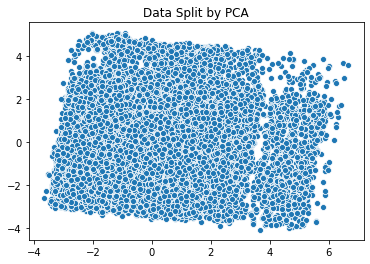

<IPython.core.display.Javascript object>

In [61]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])
plt.title("Data Split by PCA")

0.10731009776647867


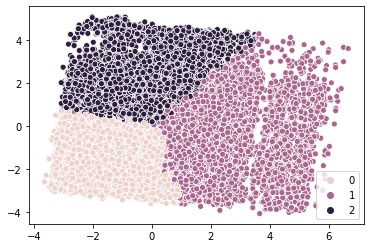

<IPython.core.display.Javascript object>

In [62]:
km = KMeans(n_clusters=3, random_state=13)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

The Silhouette Score for 4 clusters is:0.11269983941646008


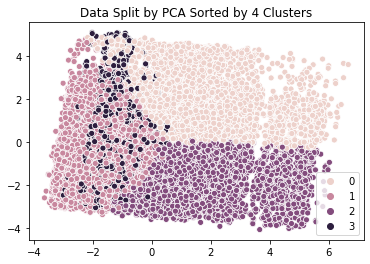

<IPython.core.display.Javascript object>

In [63]:
km = KMeans(n_clusters=4, random_state=13)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)
plt.title("Data Split by PCA Sorted by 4 Clusters")

labels = km.fit_predict(X_pca)
print(
    "The Silhouette Score for "
    + str(4)
    + " clusters is:"
    + str(metrics.silhouette_score(X_pca, labels, metric="euclidean"))
)

0.09999374966189035


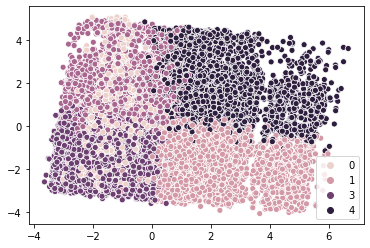

<IPython.core.display.Javascript object>

In [64]:
km = KMeans(n_clusters=5, random_state=13)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.09591190664407345


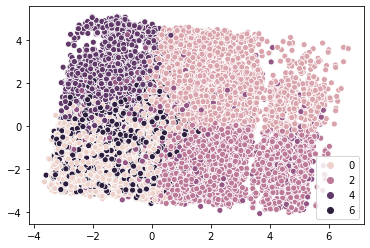

<IPython.core.display.Javascript object>

In [65]:
km = KMeans(n_clusters=6, random_state=13)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.09977444768184687


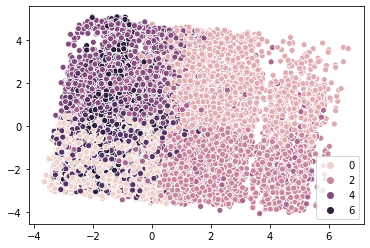

<IPython.core.display.Javascript object>

In [66]:
km = KMeans(n_clusters=7, random_state=13)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.09898913833735969


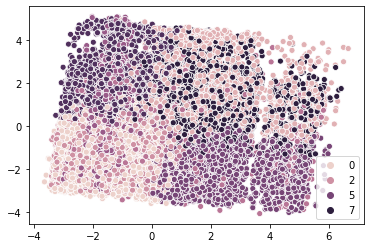

<IPython.core.display.Javascript object>

In [67]:
km = KMeans(n_clusters=8, random_state=13)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.09575948702019448


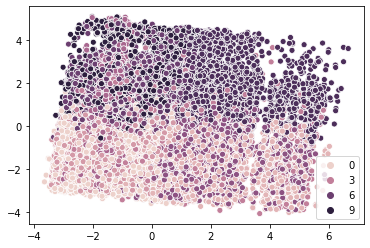

<IPython.core.display.Javascript object>

In [68]:
km = KMeans(n_clusters=9, random_state=13)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.0969436935692919


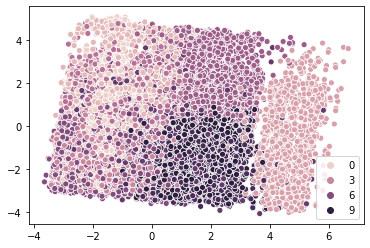

<IPython.core.display.Javascript object>

In [69]:
km = KMeans(n_clusters=10, random_state=13)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

### KMeans Clustering with t-SNE

In [105]:
scaler = StandardScaler()
X_std = scaler.fit_transform(nyc_clust)

tsne = TSNE(n_components=2, perplexity=50)
X_tsne = tsne.fit_transform(X_std)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Data Split by t-SNE')

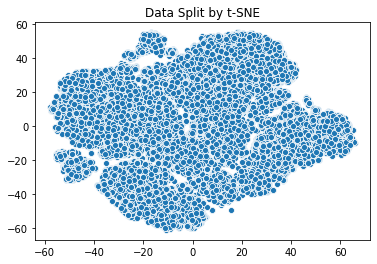

<IPython.core.display.Javascript object>

In [106]:
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])
plt.title("Data Split by t-SNE")

0.39667115


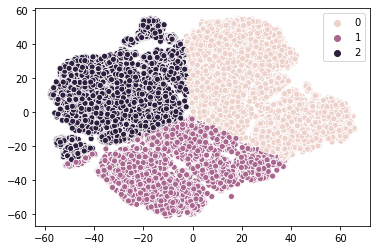

<IPython.core.display.Javascript object>

In [107]:
km = KMeans(n_clusters=3, random_state=13)
km.fit(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=km.labels_)

labels = km.fit_predict(X_tsne)
print(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))

0.42733598


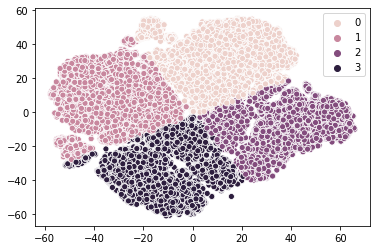

<IPython.core.display.Javascript object>

In [108]:
km = KMeans(n_clusters=4, random_state=13)
km.fit(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=km.labels_)

labels = km.fit_predict(X_tsne)
print(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))

0.41393262


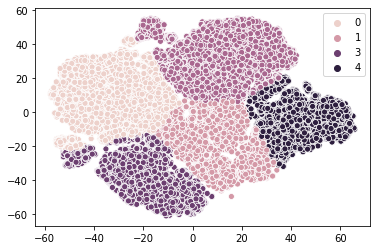

<IPython.core.display.Javascript object>

In [109]:
km = KMeans(n_clusters=5, random_state=13)
km.fit(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=km.labels_)

labels = km.fit_predict(X_tsne)
print(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))

0.379116


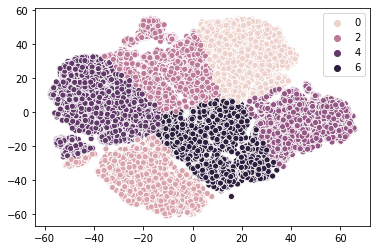

<IPython.core.display.Javascript object>

In [110]:
km = KMeans(n_clusters=6, random_state=13)
km.fit(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=km.labels_)

labels = km.fit_predict(X_tsne)
print(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))

0.38482627


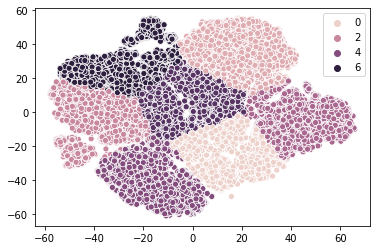

<IPython.core.display.Javascript object>

In [111]:
km = KMeans(n_clusters=7, random_state=13)
km.fit(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=km.labels_)

labels = km.fit_predict(X_tsne)
print(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))

0.3869144


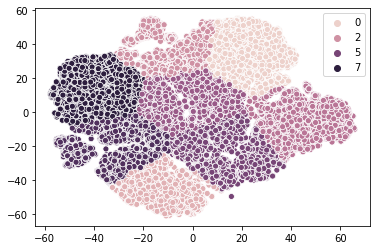

<IPython.core.display.Javascript object>

In [112]:
km = KMeans(n_clusters=8, random_state=13)
km.fit(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=km.labels_)

labels = km.fit_predict(X_tsne)
print(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))

0.39452583


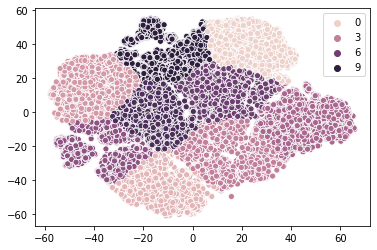

<IPython.core.display.Javascript object>

In [113]:
km = KMeans(n_clusters=9, random_state=13)
km.fit(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=km.labels_)

labels = km.fit_predict(X_tsne)
print(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))

0.3910734


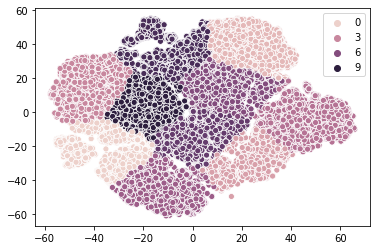

<IPython.core.display.Javascript object>

In [114]:
km = KMeans(n_clusters=10, random_state=13)
km.fit(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=km.labels_)

labels = km.fit_predict(X_tsne)
print(metrics.silhouette_score(X_tsne, labels, metric="euclidean"))

#### Comparing Silhouette Scores

KMeans with PCA Silhouette Score Results:
* 3 clusters: 0.111
* 4 clusters: 0.115
* 5 clusters: 0.104
* 6 clusters: 0.100
* 7 clusters: 0.099
* 8 clusters: 0.095
* 9 clusters: 0.096
* 10 clusters: 0.097

KMeans with t-SNE Silhouette Score Results:
* 3 clusters: 0.397
* 4 clusters: 0.427
* 5 clusters: 0.414
* 6 clusters: 0.379
* 7 clusters: 0.385
* 8 clusters: 0.387
* 9 clusters: 0.395
* 10 clusters: 0.391

It appears that applying t-SNE gives better results. The best silhouette score comes from using 4 clusters with applying t-SNE, therefore this is the type of clustering method I will be using for my analysis.

### Analyzying KMeans with 4 clusters and t-SNE

In [120]:
km = KMeans(n_clusters=4, random_state=13)
km.fit(X_tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=13, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

In [121]:
# adding the cluster labels to the original dataframe
nyc["ClusterLabel"] = km.labels_

<IPython.core.display.Javascript object>

In [122]:
# creating a table of cluster means to look for any patterns
clst_means = nyc.groupby("ClusterLabel").mean()
clst_means.style.background_gradient()

<IPython.core.display.Javascript object>

In [123]:
nyc["ClusterLabel"].value_counts()

1    9409
0    9409
3    7992
2    7911
Name: ClusterLabel, dtype: int64

<IPython.core.display.Javascript object>

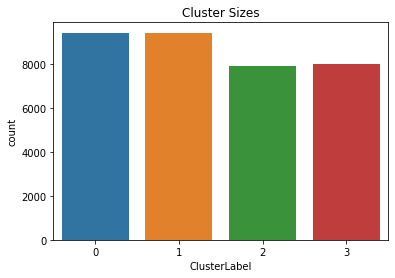

<IPython.core.display.Javascript object>

In [124]:
# Create bar chart for cluster sizes
sns.countplot(nyc["ClusterLabel"])
plt.title("Cluster Sizes")
plt.show()

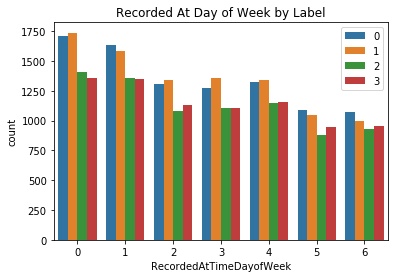

<IPython.core.display.Javascript object>

In [125]:
sns.countplot(nyc["RecordedAtTimeDayofWeek"], hue=nyc["ClusterLabel"])
plt.title("Recorded At Day of Week by Label")
plt.legend()
plt.show()

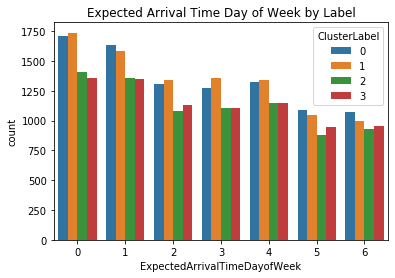

<IPython.core.display.Javascript object>

In [126]:
sns.countplot(nyc["ExpectedArrivalTimeDayofWeek"], hue=nyc["ClusterLabel"])
plt.title("Expected Arrival Time Day of Week by Label")
plt.show()

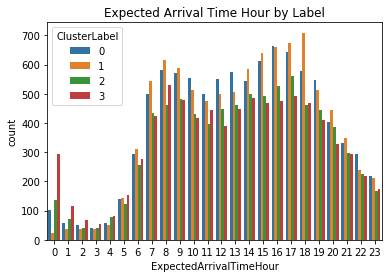

<IPython.core.display.Javascript object>

In [127]:
# it appears that Cluster 1 is more of the early morning rush hour where cluster 2 is the afternoon/evening rush hour
sns.countplot(nyc["ExpectedArrivalTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Expected Arrival Time Hour by Label")
plt.show()

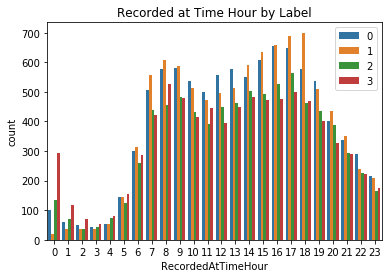

<IPython.core.display.Javascript object>

In [128]:
sns.countplot(nyc["RecordedAtTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Recorded at Time Hour by Label")
plt.legend()
plt.show()

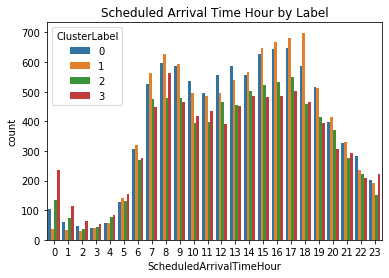

<IPython.core.display.Javascript object>

In [129]:
sns.countplot(nyc["ScheduledArrivalTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Scheduled Arrival Time Hour by Label")
plt.show()

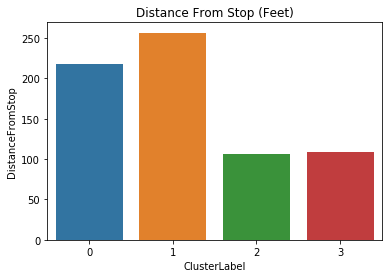

<IPython.core.display.Javascript object>

In [130]:
cluster_means = nyc.groupby("ClusterLabel").mean().reset_index()
sns.barplot(
    x=cluster_means["ClusterLabel"], y=cluster_means["DistanceFromStop"],
)
plt.title("Distance From Stop (Feet)")
plt.show()

In [131]:
cluster_means["DistanceFromStop"].value_counts()

109.063438    1
217.658093    1
256.516314    1
106.769056    1
Name: DistanceFromStop, dtype: int64

<IPython.core.display.Javascript object>

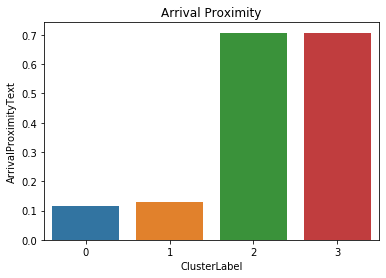

<IPython.core.display.Javascript object>

In [132]:
cluster_means = nyc.groupby("ClusterLabel").mean().reset_index()
sns.barplot(x=cluster_means["ClusterLabel"], y=cluster_means["ArrivalProximityText"])
plt.title("Arrival Proximity")
plt.show()

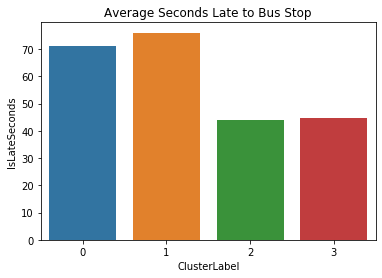

<IPython.core.display.Javascript object>

In [133]:
cluster_means = nyc.groupby("ClusterLabel").mean().reset_index()
sns.barplot(x=cluster_means["ClusterLabel"], y=cluster_means["IsLateSeconds"])
plt.title("Average Seconds Late to Bus Stop")
plt.show()

In [134]:
fig = px.scatter_geo(nyc_clust, "DestinationLat", "DestinationLong", scope="usa",)
fig.update_geos(fitbounds="locations")
fig.show()

<IPython.core.display.Javascript object>

In [135]:
fig = px.scatter_geo(nyc_clust, "OriginLat", "OriginLong", scope="usa",)
fig.update_geos(fitbounds="locations")
fig.show()

<IPython.core.display.Javascript object>

### Heirarchical Clustering with T-SNE

In [87]:
# standardize the data before applying t-sne then fitting it to the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(nyc_clust)

tsne = TSNE(n_components=2, perplexity=50)
X_tsne = tsne.fit_transform(X_std)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Data Split by t-SNE')

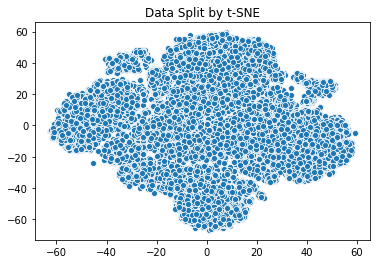

<IPython.core.display.Javascript object>

In [88]:
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])
plt.title("Data Split by t-SNE")

In [89]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="complete", affinity="cosine", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_tsne)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_tsne, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.28245765
The Silhouette Score for 5 clusters is:0.2732202
The Silhouette Score for 6 clusters is:0.29273662
The Silhouette Score for 7 clusters is:0.2906134
The Silhouette Score for 8 clusters is:0.25296038
The Silhouette Score for 9 clusters is:0.23091607
The Silhouette Score for 10 clusters is:0.21909003


<IPython.core.display.Javascript object>

In [90]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="average", affinity="cosine", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_tsne)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_tsne, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.41657692
The Silhouette Score for 5 clusters is:0.36125794
The Silhouette Score for 6 clusters is:0.31105357
The Silhouette Score for 7 clusters is:0.29863214
The Silhouette Score for 8 clusters is:0.27139306
The Silhouette Score for 9 clusters is:0.25823736
The Silhouette Score for 10 clusters is:0.24203095


<IPython.core.display.Javascript object>

In [91]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="ward", affinity="euclidean", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_tsne)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_tsne, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.39209464
The Silhouette Score for 5 clusters is:0.39165804
The Silhouette Score for 6 clusters is:0.3679807
The Silhouette Score for 7 clusters is:0.34813833
The Silhouette Score for 8 clusters is:0.33345896
The Silhouette Score for 9 clusters is:0.33322072
The Silhouette Score for 10 clusters is:0.3349361


<IPython.core.display.Javascript object>

### Heirarchical Clustering with PCA

In [115]:
# since I am performing pca its necessary to standardize data and fit it to data frame.
scaler = StandardScaler()
X_std = scaler.fit_transform(nyc_clust)

# Computing the principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Data Split by PCA')

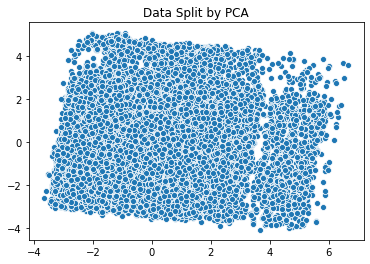

<IPython.core.display.Javascript object>

In [116]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])
plt.title("Data Split by PCA")

In [117]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="complete", affinity="cosine", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_pca)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.027989140973845236
The Silhouette Score for 5 clusters is:0.019267851849225602
The Silhouette Score for 6 clusters is:0.008023552477804922
The Silhouette Score for 7 clusters is:-0.002420634228131262
The Silhouette Score for 8 clusters is:0.0012686011381902779
The Silhouette Score for 9 clusters is:0.002044617105917884
The Silhouette Score for 10 clusters is:0.003259486867417385


<IPython.core.display.Javascript object>

In [118]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="average", affinity="cosine", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_pca)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.05043763275985984
The Silhouette Score for 5 clusters is:0.05059943028162836
The Silhouette Score for 6 clusters is:0.05049073541351865
The Silhouette Score for 7 clusters is:0.03287458614059055
The Silhouette Score for 8 clusters is:0.025848923693429966
The Silhouette Score for 9 clusters is:0.018816097569164688
The Silhouette Score for 10 clusters is:0.013817977302632272


<IPython.core.display.Javascript object>

In [119]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="ward", affinity="euclidean", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_pca)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.044167189882311
The Silhouette Score for 5 clusters is:0.047864863972826535
The Silhouette Score for 6 clusters is:0.037021440994655826
The Silhouette Score for 7 clusters is:0.02571779690078683
The Silhouette Score for 8 clusters is:0.030383575022095214
The Silhouette Score for 9 clusters is:0.023451228667531236
The Silhouette Score for 10 clusters is:0.02091711770067934


<IPython.core.display.Javascript object>

#### Comparing Silhouette Scores

##### Agglomerative Clustering with t-SNE

Silhouette Score for Agglomerative Clustering with complete linkage:
* 4 clusters is:0.28245765
* 5 clusters is:0.2732202
* 6 clusters is:0.29273662
* 7 clusters is:0.2906134
* 8 clusters is:0.25296038
* 9 clusters is:0.23091607
* 10 clusters is:0.21909003

Silhouette Score for Agglomerative Clustering with average linkage:
* 4 clusters is:0.41657692
* 5 clusters is:0.36125794
* 6 clusters is:0.31105357
* 7 clusters is:0.29863214
* 8 clusters is:0.27139306
* 9 clusters is:0.25823736
* 10 clusters is:0.24203095

Silhouette Score for Agglomerative Clustering with ward linkage:
* 4 clusters is:0.39209464
* 5 clusters is:0.39165804
* 6 clusters is:0.3679807
* 7 clusters is:0.34813833
* 8 clusters is:0.33345896
* 9 clusters is:0.33322072
* 10 clusters is:0.3349361

##### Agglomerative Clustering with PCA

Silhouette Score for Agglomerative Clustering with complete linkage:
* 4 clusters is:0.027989140973845236
* 5 clusters is:0.019267851849225602
* 6 clusters is:0.008023552477804922
* 7 clusters is:-0.002420634228131262
* 8 clusters is:0.0012686011381902779
* 9 clusters is:0.002044617105917884
* 10 clusters is:0.003259486867417385

Silhouette Score for Agglomerative Clustering with average linkage:
* 4 clusters is:0.05043763275985984
* 5 clusters is:0.05059943028162836
* 6 clusters is:0.05049073541351865
* 7 clusters is:0.03287458614059055
* 8 clusters is:0.025848923693429966
* 9 clusters is:0.018816097569164688
* 10 clusters is:0.013817977302632272

Silhouette Score for Agglomerative Clustering with ward linkage:
* 4 clusters is:0.044167189882311
* 5 clusters is:0.047864863972826535
* 6 clusters is:0.037021440994655826
* 7 clusters is:0.02571779690078683
* 8 clusters is:0.030383575022095214
* 9 clusters is:0.023451228667531236
* 10 clusters is:0.02091711770067934

The best Silhouette score comes from Agglomerative Clustering with t-SNE, 4 clusters and average linkage.

### Analyzying Agglomerative Clustering with t-SNE

The Silhouette Score for 6 clusters is:0.40110302


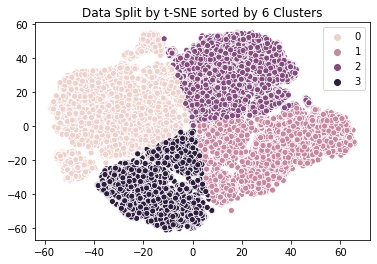

<IPython.core.display.Javascript object>

In [136]:
agg_clstr = AgglomerativeClustering(linkage="average", affinity="cosine", n_clusters=4)
clusters = agg_clstr.fit_predict(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=agg_clstr.labels_)
plt.title("Data Split by t-SNE sorted by 6 Clusters")
print(
    "The Silhouette Score for "
    + str(6)
    + " clusters is:"
    + str(metrics.silhouette_score(X_tsne, clusters, metric="euclidean"))
)

In [137]:
nyc["ClusterLabel"] = agg_clstr.labels_
clst_means = nyc.groupby("ClusterLabel").mean()
clst_means.style.background_gradient()

<IPython.core.display.Javascript object>

In [138]:
nyc["ClusterLabel"].value_counts()

0    10772
2     8694
1     8673
3     6582
Name: ClusterLabel, dtype: int64

<IPython.core.display.Javascript object>

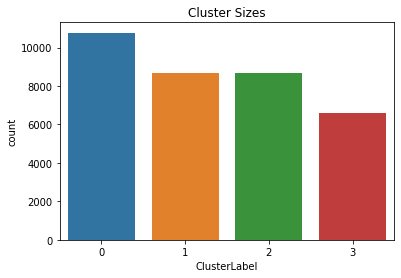

<IPython.core.display.Javascript object>

In [139]:
# Create bar chart for cluster sizes
sns.countplot(nyc["ClusterLabel"])
plt.title("Cluster Sizes")
plt.show()

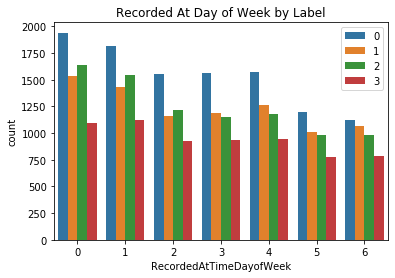

<IPython.core.display.Javascript object>

In [140]:
sns.countplot(nyc["RecordedAtTimeDayofWeek"], hue=nyc["ClusterLabel"])
plt.title("Recorded At Day of Week by Label")
plt.legend()
plt.show()

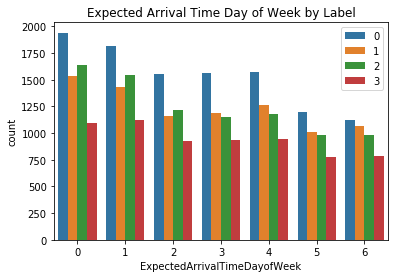

<IPython.core.display.Javascript object>

In [141]:
sns.countplot(nyc["ExpectedArrivalTimeDayofWeek"], hue=nyc["ClusterLabel"])
plt.title("Expected Arrival Time Day of Week by Label")
plt.legend()
plt.show()

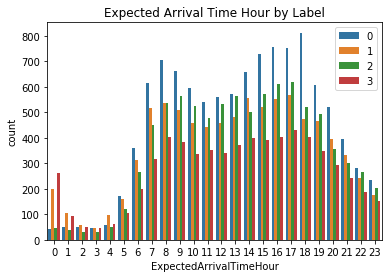

<IPython.core.display.Javascript object>

In [142]:
# want to increase figure size to emphasize clusters
sns.countplot(nyc["ExpectedArrivalTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Expected Arrival Time Hour by Label")
plt.legend()
plt.show()

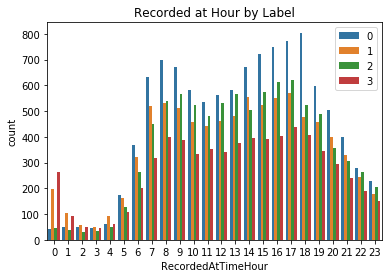

<IPython.core.display.Javascript object>

In [143]:
sns.countplot(nyc["RecordedAtTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Recorded at Hour by Label")
plt.legend()
plt.show()

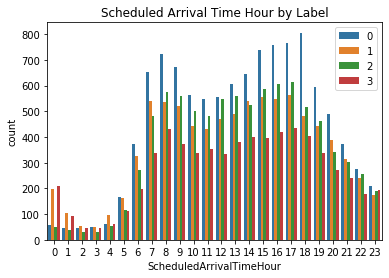

<IPython.core.display.Javascript object>

In [144]:
sns.countplot(
    nyc["ScheduledArrivalTimeHour"], hue=nyc["ClusterLabel"],
)
plt.title("Scheduled Arrival Time Hour by Label")
plt.legend()
plt.show()

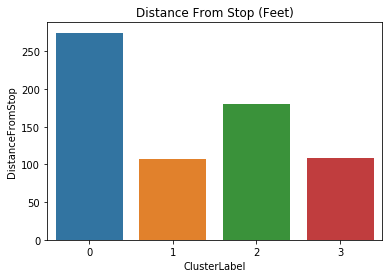

<IPython.core.display.Javascript object>

In [145]:
cluster_means = nyc.groupby("ClusterLabel").mean().reset_index()
sns.barplot(
    x=cluster_means["ClusterLabel"], y=cluster_means["DistanceFromStop"],
)
plt.title("Distance From Stop (Feet)")
plt.show()

In [146]:
cluster_means["DistanceFromStop"].value_counts()

108.297934    1
274.837913    1
180.791695    1
107.531189    1
Name: DistanceFromStop, dtype: int64

<IPython.core.display.Javascript object>

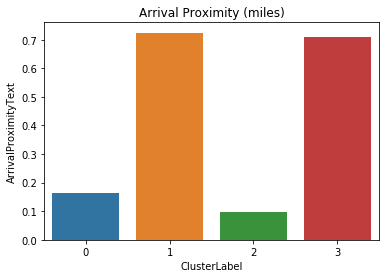

<IPython.core.display.Javascript object>

In [147]:
cluster_means = nyc.groupby("ClusterLabel").mean().reset_index()
sns.barplot(
    x=cluster_means["ClusterLabel"], y=cluster_means["ArrivalProximityText"],
)
plt.title("Arrival Proximity (miles)")
plt.show()

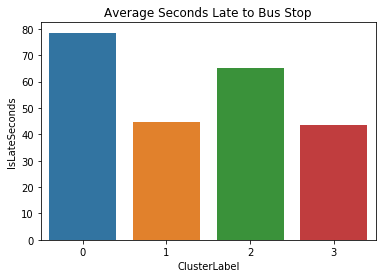

<IPython.core.display.Javascript object>

In [148]:
cluster_means = nyc.groupby("ClusterLabel").mean().reset_index()
sns.barplot(x=cluster_means["ClusterLabel"], y=cluster_means["IsLateSeconds"])
plt.title("Average Seconds Late to Bus Stop")
plt.show()